# **Linear Regression**

equation ( y=mx+c )

In linear Regression, we predict the values of continuous variables.

use in the case of regression problem

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("USA_Housing.csv")

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [10]:
x=df.iloc[:,:-2]
y=df['Price']

(array([  11.,   88.,  344.,  804., 1313., 1252.,  793.,  314.,   68.,
          13.]),
 array([  15938.65792329,  261251.35154843,  506564.04517357,
         751876.73879871,  997189.43242385, 1242502.126049  ,
        1487814.81967414, 1733127.51329928, 1978440.20692442,
        2223752.90054956, 2469065.5941747 ]),
 <BarContainer object of 10 artists>)

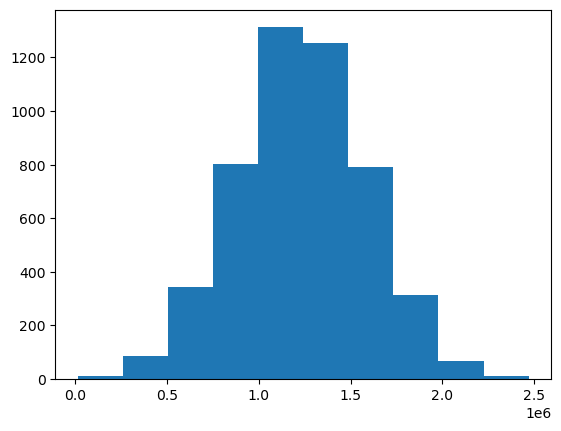

In [11]:
# matplotlib
plt.hist(y)

<Axes: xlabel='Price', ylabel='Count'>

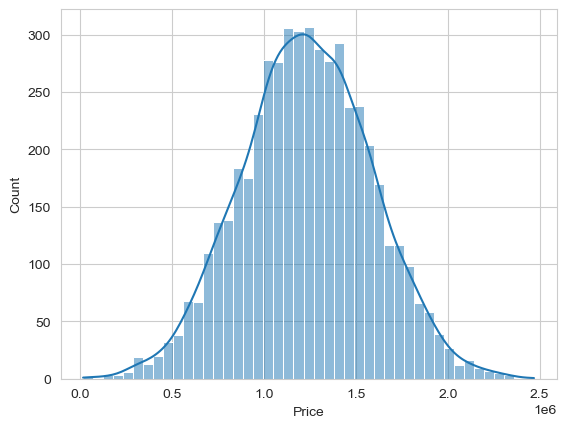

In [12]:
# seaborn
sns.set_style("whitegrid")
sns.histplot(y,kde=True)

**data is full balanced because it is in normal distribution**

In [13]:
df.corr()

C:\Users\Preeti\AppData\Local\Temp\ipykernel_14880\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


C:\Users\Preeti\AppData\Local\Temp\ipykernel_14880\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

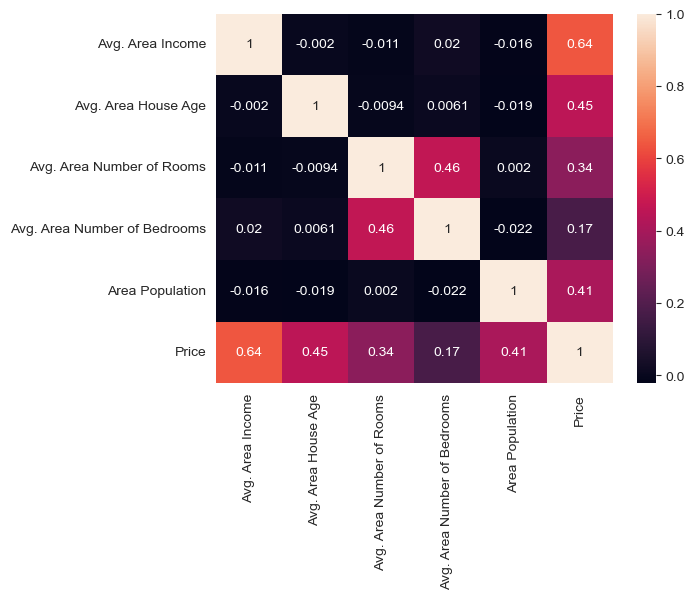

In [14]:
sns.heatmap(df.corr(),annot=True)

# **Train test split**

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# **Regression**

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred=lr.predict(x_test)

In [20]:
lr.score(x_test,y_test)

0.9146454505138175

<Axes: xlabel='Price'>

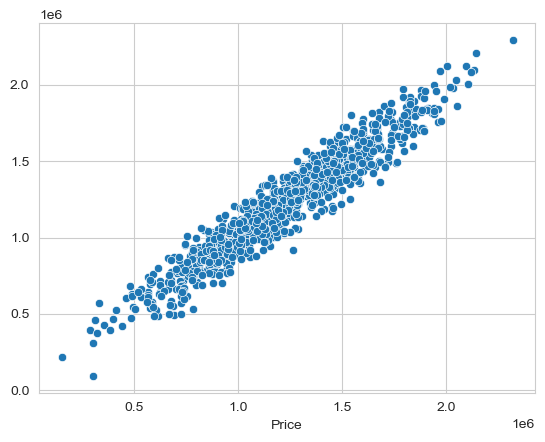

In [22]:
sns.scatterplot(x=y_test,y=y_pred)

In [23]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 82657.94605891762
MSE: 10549721686.157969
RMSE: 102711.83810135016
